In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.plotly as py
import plotly.graph_objs as go

import plotly.tools as tls
import plotly.figure_factory as ff

import copy

import plotly.io as pio

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

In [2]:
advertising = pd.DataFrame(pd.read_csv('Datasets/advertising.csv'))
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
advertising.shape

(200, 4)

In [4]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [5]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
# Cleaning null values if any
advertising.isnull().sum()*100/advertising.shape[0]

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

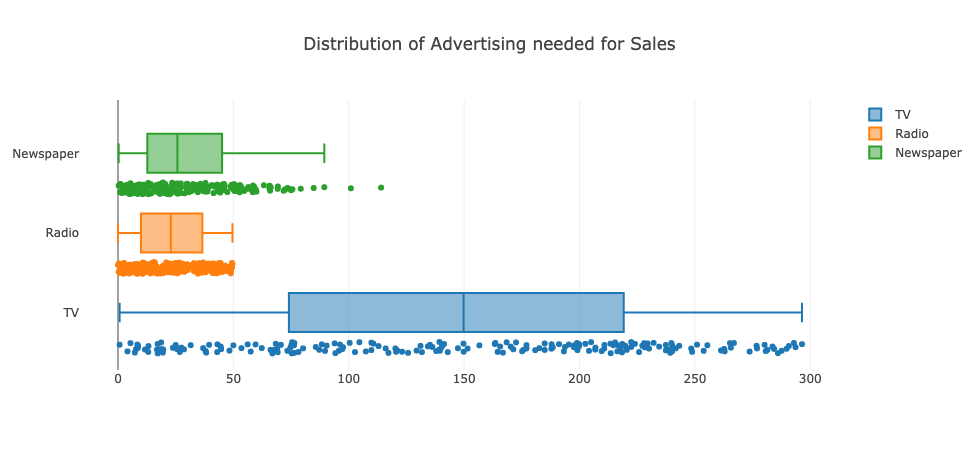

In [58]:
# fig, axs = plt.subplots(3, figsize = (3, 5))
# plt1 = sns.boxplot(advertising['TV'], ax = axs[0])
# plt2 = sns.boxplot(advertising['Newspaper'], axs[1])
trace0 = go.Box(
    x=advertising['TV'],
    name="TV",
    boxpoints='all',
    jitter=0.3,
    pointpos=-1.8
    
)
trace1 = go.Box(
    x=advertising['Radio'],
    name="Radio",
    boxpoints='all',
    jitter=0.3,
    pointpos=-1.8
)
trace2 = go.Box(
    x=advertising['Newspaper'],
    name="Newspaper",
    boxpoints='all',
    jitter=0.3,
    pointpos=-1.8
)

data = [trace0, trace1, trace2]
fig = go.Figure(data=data)
fig.layout.title = 'Distribution of Advertising needed for Sales'
iplot(fig)

The above graph shows the distribution of of expense to make a sale from each information medium as a box chart showing the medium, 25%, 75% and outliers

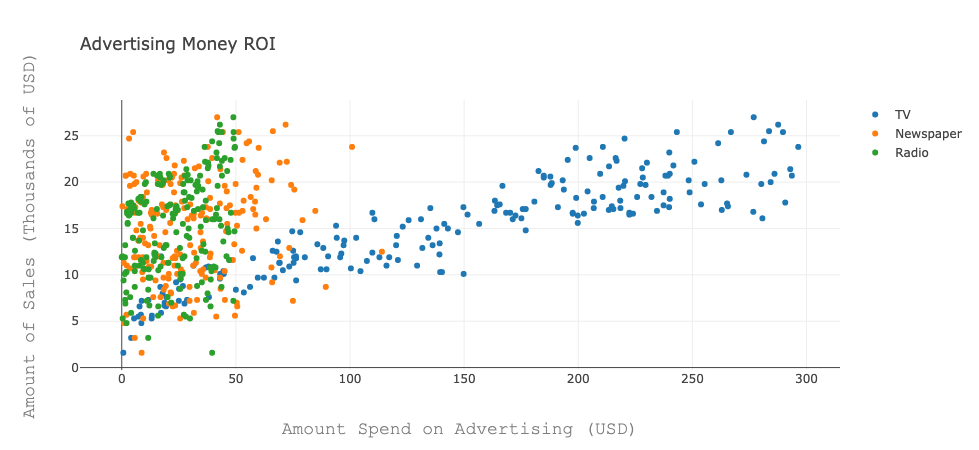

In [45]:
trace0 = go.Scatter(
    x = advertising['TV'],
    y = advertising['Sales'],
    mode = 'markers',
    name='TV'
)
trace1 = go.Scatter(
    x = advertising['Newspaper'],
    y = advertising['Sales'],
    mode = 'markers',
    name='Newspaper'
)
trace2 = go.Scatter(
    x = advertising['Radio'],
    y = advertising['Sales'],
    mode = 'markers',
    name='Radio'
)         
layout = go.Layout(
    title=go.layout.Title(
        text='Advertising Money ROI',
        xref='paper',
        x=0
    ),
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text='Amount Spend on Advertising (USD)',
            font=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        )
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text='Amount of Sales (Thousands of USD)',
            font=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        )
    )
)

data = [trace0, trace1, trace2]
fig = go.Figure(data=data, layout=layout)
# Plot and embed in ipython notebook!
iplot(fig, filename='basic-scatter')


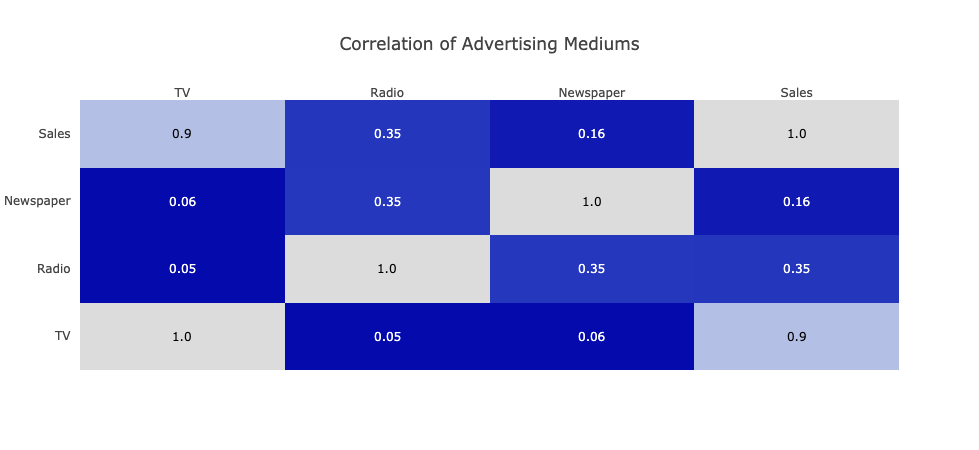

In [52]:
z = advertising.corr().values
x = ['TV', 'Radio', 'Newspaper', 'Sales']
y = ['TV', 'Radio', 'Newspaper', 'Sales']
z_text = np.around(z, decimals=2)

# data = [go.Heatmap( z=advertising.corr(), colorscale='Viridis', annot=True)]
# data = [go.Heatmap( z=advertising.corr(), colorscale='Viridis' )]
fig = ff.create_annotated_heatmap(z=z, x=x, y=y, annotation_text=z_text, colorscale='Blues')
# fig = ff.create_annotated_heatmap(z, colorscale='Viridis')

fig.layout.title = 'Correlation of Advertising Mediums'

iplot(fig, filename='annotated_heatmap_text')

In [10]:
x = advertising['TV']
y = advertising['Sales']

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size=0.3, random_state=100)

In [12]:
x_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [13]:
y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

In [14]:
import statsmodels.api as sm
from sklearn import datasets, linear_model

In [15]:
x_train_sm = sm.add_constant(x_train)

lr = sm.OLS(y_train, x_train_sm).fit()

In [16]:
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [17]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Tue, 04 Jun 2019   Prob (F-statistic):           1.52e-52
Time:                        15:41:57   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

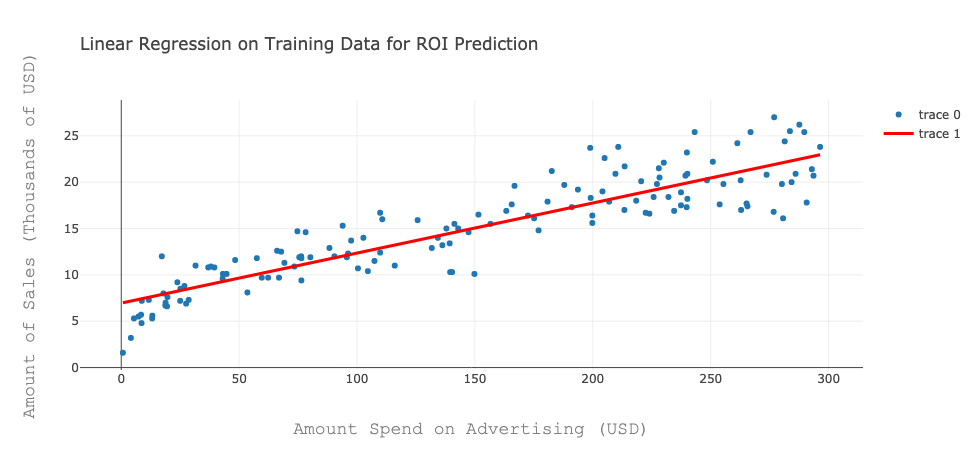

In [54]:
# Create a trace
trace0 = go.Scatter(
    x = x_train,
    y = y_train,
    mode = 'markers'
)
# regr = linear_model.LinearRegression()
# regr.fit(x_train, y_train)
# print('Coefficients: \n', regr.coef_)
trace1 = go.Scatter(x=x_train, 
                y=6.948 + 0.054*x_train,
                mode='lines',
                line=dict(color='red', width=3)
                )
layout = go.Layout(
    title=go.layout.Title(
        text='Linear Regression on Training Data for ROI Prediction',
        xref='paper',
        x=0
    ),
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text='Amount Spend on Advertising (USD)',
            font=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        )
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text='Amount of Sales (Thousands of USD)',
            font=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        )
    )
)
data = [trace0, trace1]
fig = go.Figure(data=data, layout=layout)
# Plot and embed in ipython notebook!
iplot(fig, filename='basic-scatter')
# pio.write_image(data, filename='basic-scatter')

Residual Analysis: Distribution of Error Terms

In [21]:
y_train_pred = lr.predict(x_train_sm)
res = (y_train - y_train_pred)

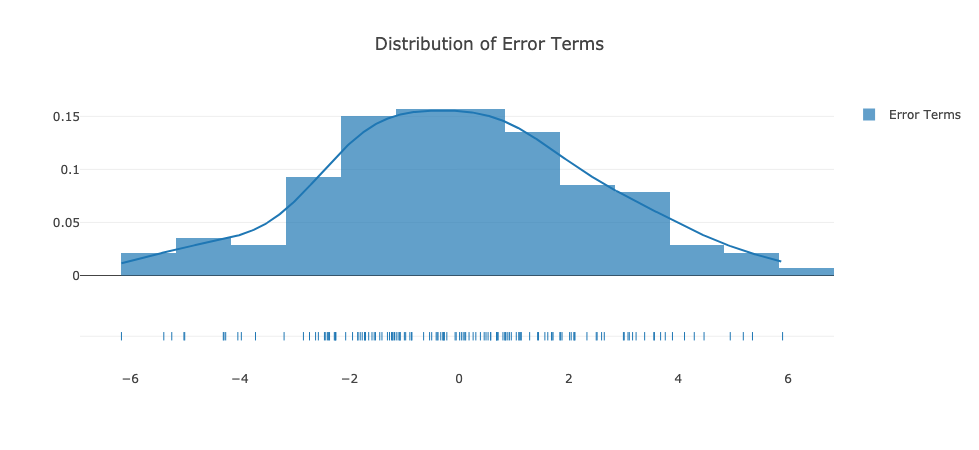

In [59]:
group_labels = ['Error Terms']  
hist_data = [res]
fig = ff.create_distplot(hist_data, group_labels)
fig.layout.title = 'Distribution of Error Terms'
iplot(fig, filename='Basic Distplot')

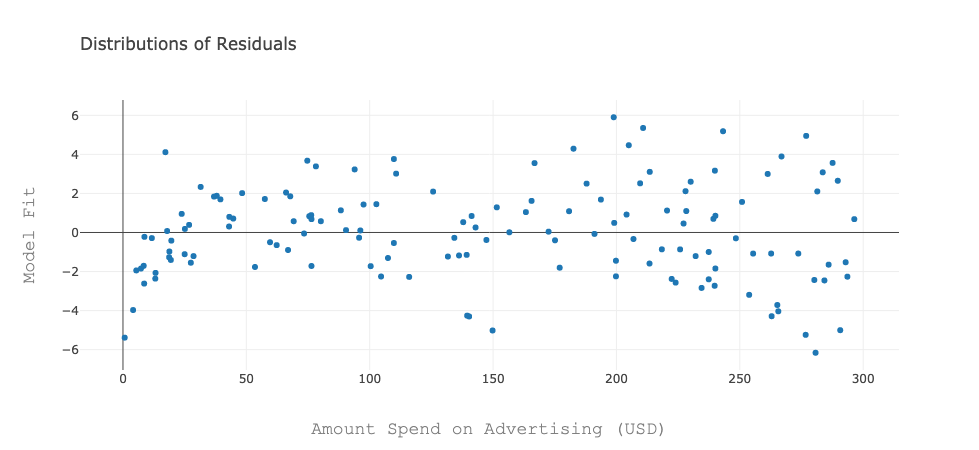

In [64]:
trace0 = go.Scatter(
    x = x_train,
    y = res,
    mode = 'markers'
)
data = [trace0]
layout = go.Layout(
    title=go.layout.Title(
        text='Distributions of Residuals',
        xref='paper',
        x=0
    ),
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text='Amount Spend on Advertising (USD)',
            font=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        )
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text='Model Fit',
            font=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        )
    )
)
fig = go.Figure(data=data, layout=layout)
# Plot and embed in ipython notebook!
iplot(fig, filename='basic-scatter')

Predictions on the Test Set

In [33]:
x_test_sm = sm.add_constant(x_test)
y_pred = lr.predict(x_test_sm)
y_pred.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [34]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [35]:
np.sqrt(mean_squared_error(y_test, y_pred))

2.019296008966232

In [36]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.792103160124566

Visualize the fit on the test set

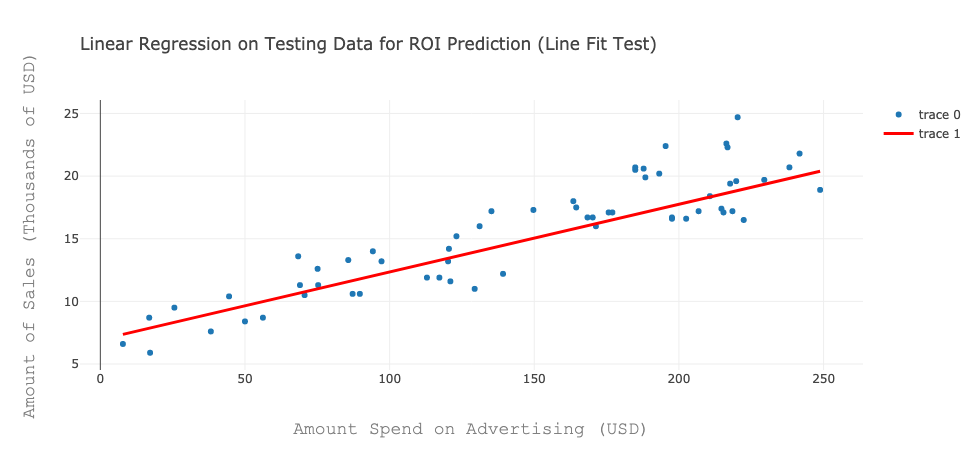

In [56]:
trace0 = go.Scatter(
    x = x_test,
    y = y_test,
    mode = 'markers'
)
trace1 = go.Scatter(x=x_test, 
                y=6.948 + 0.054*x_test,
                mode='lines',
                line=dict(color='red', width=3)
                )
data = [trace0, trace1]
layout = go.Layout(
    title=go.layout.Title(
        text='Linear Regression on Testing Data for ROI Prediction (Line Fit Test)',
        xref='paper',
        x=0
    ),
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text='Amount Spend on Advertising (USD)',
            font=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        )
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text='Amount of Sales (Thousands of USD)',
            font=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        )
    )
)
fig = go.Figure(data=data, layout=layout)

# Plot and embed in ipython notebook!
iplot(fig, filename='basic-scatter')